# Hotel booking data visualization and cancellation prediction

In this project, I consider the different factors that influence hotel cancellation rates using a dataset from kaggle for which the URL is below.

URL - https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

## Import of libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

## Import of dataset and inspection of dataset

In [23]:
hb = pd.read_csv(r"C:\Users\pjhop\OneDrive\Documents\Programming & Coding\Python\Projects\Datasets\hotel_bookings.csv")
pd.set_option('display.max_columns', None)
hb.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [24]:
hb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [25]:
hb.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

When looking at the data, we can see that there are four variables with missing data, however this shouldn't be an issue with the agent and company data as we can drop these variables, because they have a large amount of missing data. Whilst, for the country data that is missing, we can drop those datapoints.

For the four missing children datapoints, we will assume that there were no children and fill the values in with zero. 

In [26]:
hb = hb.dropna(subset=['country'])
hb = hb.drop(columns=['agent', 'company'])
hb['children'] = hb['children'].fillna(0)
hb.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [27]:
#View of summary statistics
hb.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,118902,118902.000000,118902.000000,118902.000000,118902,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902,118902,118902,118902,118902.000000,118902.000000,118902.000000,118902,118902,118902.000000,118902,118902.000000,118902,118902.000000,118902.000000,118902.000000,118902,118902
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN,NaN,10,12,NaN,3,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79306,NaN,NaN,NaN,13856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91867,48590,56403,97730,NaN,NaN,NaN,85601,73863,NaN,104167,NaN,89174,NaN,NaN,NaN,74745,1461
mean,NaN,0.371373,104.308027,2016.157617,NaN,27.166726,15.800567,0.928891,2.502136,1.858404,0.104203,0.007948,NaN,NaN,NaN,NaN,0.032010,0.087139,0.131629,NaN,NaN,0.221174,NaN,2.330676,NaN,102.000808,0.061883,0.571706,NaN,NaN
std,NaN,0.483174,106.903127,0.707479,NaN,13.589774,8.780371,0.996211,1.900165,0.578576,0.399166,0.097379,NaN,NaN,NaN,NaN,0.176026,0.845855,1.484647,NaN,NaN,0.652775,NaN,17.630161,NaN,50.487004,0.244168,0.792678,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,70.000000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,95.000000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,161.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [28]:
canceled_vc = hb.is_canceled.value_counts()

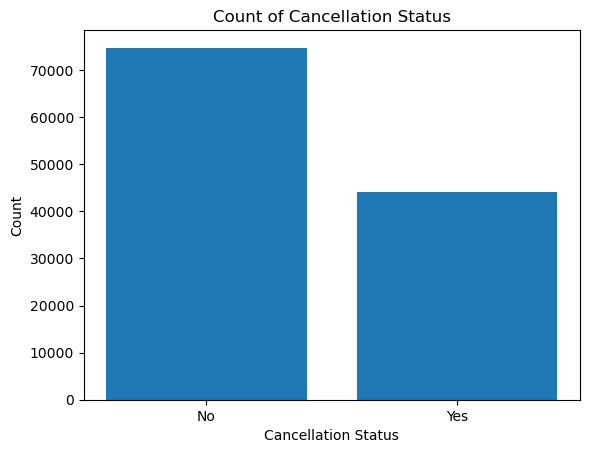

<Figure size 640x480 with 0 Axes>

In [29]:
#Plot barplot
plt.bar(canceled_vc.index, canceled_vc.values)

#Format x-axis with yes and no labels included
plt.xticks(canceled_vc.index, ['No', 'Yes'])

#Labels and titles
plt.xlabel('Cancellation Status')
plt.ylabel('Count')
plt.title('Count of Cancellation Status')

#Display
plt.show()
plt.clf()

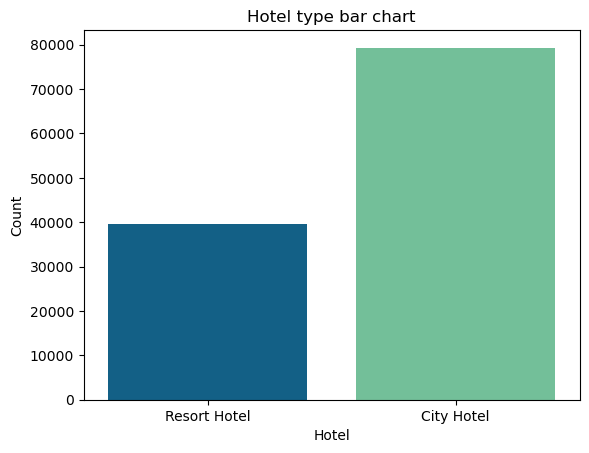

<Figure size 640x480 with 0 Axes>

In [30]:
#Custom palette
hotel_type_palette=["#006699", "#66cc99"]

#Seaborn bar chart
sns.countplot(x='hotel', data=hb, palette=hotel_type_palette)

#Label and title
plt.xlabel('Hotel')
plt.ylabel('Count')
plt.title('Hotel type bar chart')

plt.show()
plt.clf()

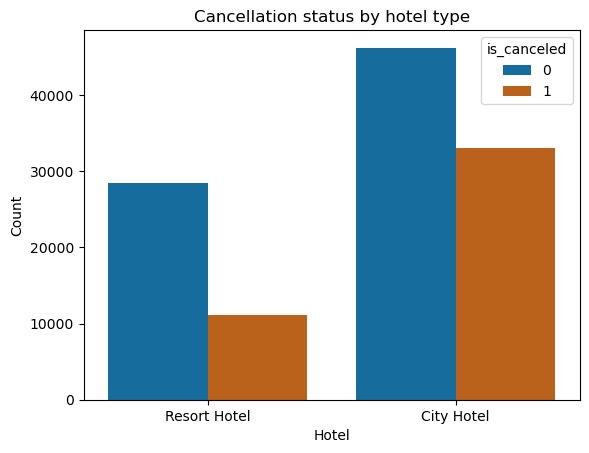

<Figure size 640x480 with 0 Axes>

In [31]:
#Blue and orange palette
custom_palette = sns.color_palette(["#0072B2", "#D55E00"])

#Seaborn bar chart
sns.countplot(x='hotel', hue='is_canceled', data=hb, palette=custom_palette)

#Label and title
plt.xlabel('Hotel')
plt.ylabel('Count')
plt.title('Cancellation status by hotel type')

plt.show()
plt.clf()

In this bar chart, we can clearly see the distribution of cancellations across the two types of hotels, seeing that the city is much more likely to cancel stays than the resort hotel. 

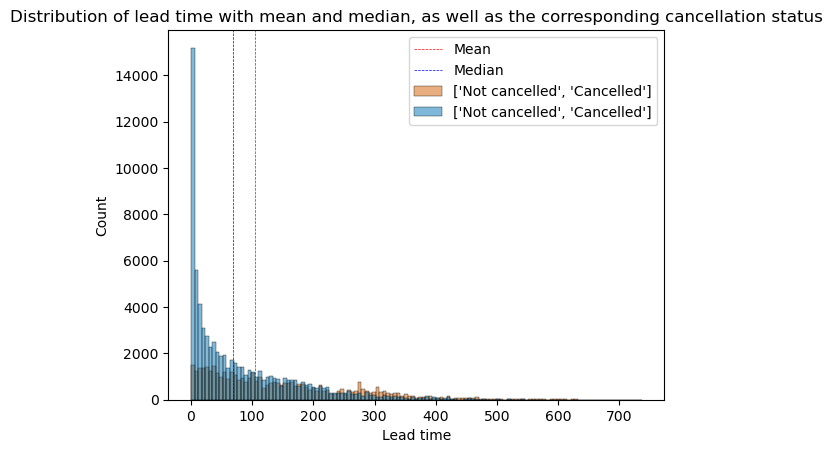

<Figure size 640x480 with 0 Axes>

In [32]:
#Histogram
sns.histplot(x='lead_time', hue='is_canceled', data=hb, palette=custom_palette, label=['Not cancelled', 'Cancelled'])

#Add vertical line
plt.axvline(hb["lead_time"].mean(), color='r', linestyle='dashed', linewidth=0.5, label='Mean')
plt.axvline(hb["lead_time"].median(), color='b', linestyle='dashed', linewidth=0.5, label='Median')

#Title and label
plt.xlabel('Lead time')
plt.title('Distribution of lead time with mean and median, as well as the corresponding cancellation status')

#Add legend 
plt.legend()

#Display
plt.show()
plt.clf()

It also shows us the distribution of lead times across all bookings. From which we can see the majority are booked between 0 to 100 days before the stay, with the median being around 70 and the mean being just over 100 days showing the dataset is skewed to the right. 

This histogram is interesting because it shows us that in general the longer the lead time, the more likely the booking is to be cancelled. This could be down to the fact, that the further into the future a stay is the more factors can influence the outcome, such as finances, health and other lifestyle factors.  

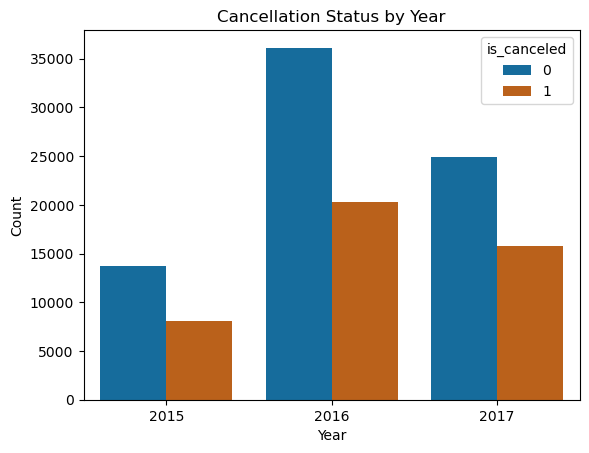

<Figure size 640x480 with 0 Axes>

In [33]:
#Countplot
sns.countplot(x='arrival_date_year', hue='is_canceled', data=hb, palette=custom_palette)

#Title and labels
plt.title('Cancellation Status by Year')
plt.xlabel('Year')
plt.ylabel('Count')

#Display
plt.show()
plt.clf()

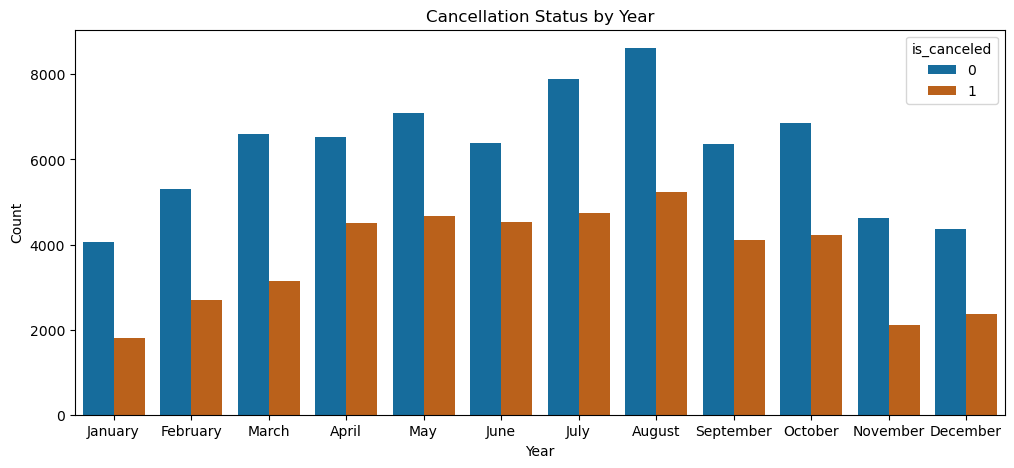

<Figure size 640x480 with 0 Axes>

In [34]:
#Figure size
plt.figure(figsize=(12, 5))

#Countplot - in month order starting with January
sns.countplot(x='arrival_date_month', hue='is_canceled', data=hb, palette=custom_palette, order=['January', 'February', 
                                                                                                'March', 'April', 'May',
                                                                                                'June', 'July', 'August',
                                                                                                'September', 'October',
                                                                                                'November', 'December'])

#Title and labels
plt.title('Cancellation Status by Year')
plt.xlabel('Year')
plt.ylabel('Count')

#Display
plt.show()
plt.clf()

This barchart demonstrates how both the total bookings and cancellations peak in the summer months, in particular August. It also shows how quickly bookings decline from October to December.

In [35]:
rg_hb = hb[hb.is_repeated_guest == 1]
pc_hb = hb[hb.previous_cancellations == 1]

Above, we have generated datasets where the guest has been before and another where the guest has cancelled before.

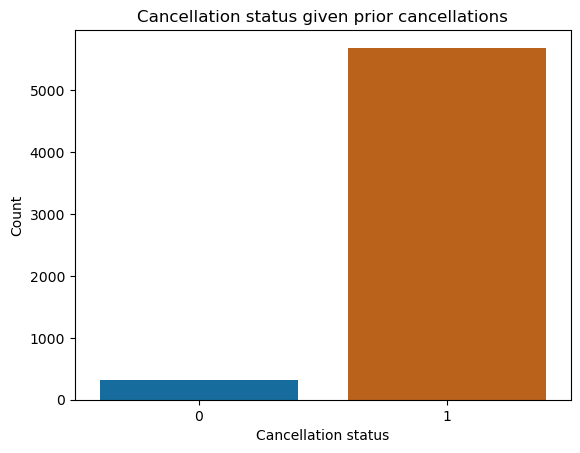

<Figure size 640x480 with 0 Axes>

In [36]:
#Countplot
sns.countplot(x='is_canceled', data=pc_hb, palette=custom_palette)

#Title and labels
plt.xlabel('Cancellation status')
plt.ylabel('Count')
plt.title('Cancellation status given prior cancellations')

#Display
plt.show()
plt.clf()

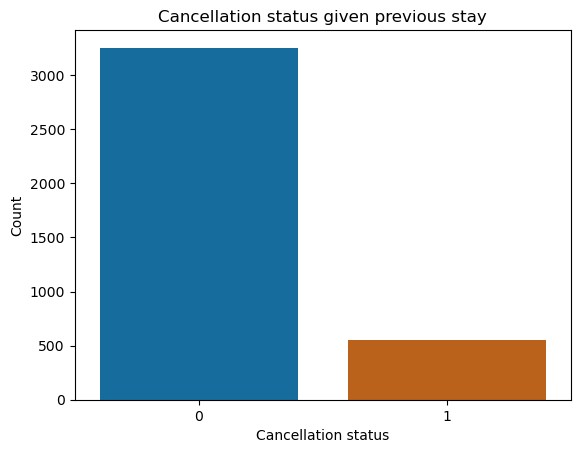

<Figure size 640x480 with 0 Axes>

In [37]:
#Countplot
sns.countplot(x='is_canceled', data=rg_hb, palette=custom_palette)

#Labels and titles
plt.xlabel('Cancellation status')
plt.ylabel('Count')
plt.title('Cancellation status given previous stay')

#Display
plt.show()
plt.clf()

These two bar charts highlight the key differences between guests who have cancelled before and those who have had prior stays. Those who have cancelled before were extremely likely to cancel again, whilst those who stayed before were the polar opposite and extremely unlikely to cancel.

# Prediction using Support Vector Machine

## Data preparation for SVM - One-hot encoding

In [38]:
hb.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [39]:
#Get dummies for categorical columns
hbd = pd.get_dummies(hb, columns=['hotel', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type'], drop_first=True)
hbd.head()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,hotel_Resort Hotel,arrival_date_year_2016,arrival_date_year_2017,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,arrival_date_week_number_2,arrival_date_week_number_3,arrival_date_week_number_4,arrival_date_week_number_5,arrival_date_week_number_6,arrival_date_week_number_7,arrival_date_week_number_8,arrival_date_week_number_9,arrival_date_week_number_10,arrival_date_week_number_11,arrival_date_week_number_12,arrival_date_week_number_13,arrival_date_week_number_14,arrival_date_week_number_15,arrival_date_week_number_16,arrival_date_week_number_17,arrival_date_week_number_18,arrival_date_week_number_19,arrival_date_week_number_20,arrival_date_week_number_21,arrival_date_week_number_22,arrival_date_week_number_23,arrival_date_week_number_24,arrival_date_week_number_25,arrival_date_week_number_26,arrival_date_week_number_27,arrival_date_week_number_28,arrival_date_week_number_29,arrival_date_week_number_30,arrival_date_week_number_31,arrival_date_week_number_32,arrival_date_week_number_33,arrival_date_week_number_34,arrival_date_week_number_35,arrival_date_week_number_36,arrival_date_week_number_37,arrival_date_week_number_38,arrival_date_week_number_39,arrival_date_week_number_40,arrival_date_week_number_41,arrival_date_week_number_42,arrival_date_week_number_43,arrival_date_week_number_44,arrival_date_week_number_45,arrival_date_week_number_46,arrival_date_week_number_47,arrival_date_week_number_48,arrival_date_week_number_49,arrival_date_week_number_50,arrival_date_week_number_51,arrival_date_week_number_52,arrival_date_week_number_53,arrival_date_day_of_month_2,arrival_date_day_of_month_3,arrival_date_day_of_month_4,arrival_date_day_of_month_5,arrival_date_day_of_month_6,arrival_date_day_of_month_7,arrival_date_day_of_month_8,arrival_date_day_of_month_9,arrival_date_day_of_month_10,arrival_date_day_of_month_11,arrival_date_day_of_month_12,arrival_date_day_of_month_13,arrival_date_day_of_month_14,arrival_date_day_of_month_15,arrival_date_day_of_month_16,arrival_date_day_of_month_17,arrival_date_day_of_month_18,arrival_date_day_of_month_19,arrival_date_day_of_month_20,arrival_date_day_of_month_21,arrival_date_day_of_month_22,arrival_date_day_of_month_23,arrival_date_day_of_month_24,arrival_date_day_of_month_25,arrival_date_day_of_month_26,arrival_date_day_of_month_27,arrival_date_day_of_month_28,arrival_date_day_of_month_29,arrival_date_day_of_month_30,arrival_date_day_of_month_31,meal_FB,meal_HB,meal_SC,meal_Undefined,country_AGO,country_AIA,country_ALB,country_AND,country_ARE,country_ARG,country_ARM,country_ASM,country_ATA,country_ATF,country_AUS,country_AUT,country_AZE,country_BDI,country_BEL,country_BEN,country_BFA,country_BGD,country_BGR,country_BHR,country_BHS,country_BIH,country_BLR,country_BOL,country_BRA,country_BRB,country_BWA,country_CAF,country_CHE,country_CHL,country_CHN,country_CIV,country_CMR,country_CN,country_COL,country_COM,country_CPV,country_CRI,country_CUB,country_CYM,country_CYP,country_CZE,country_DEU,country_DJI,country_DMA,country_DNK,country_DOM,country_DZA,country_ECU,country_EGY,country_ESP,country_EST,country_ETH,country_FIN,country_FJI,country_FRA,country_FRO,country_GAB,country_GBR,country_GEO,country_GGY,country_GHA,country_GIB,country_GLP,country_GNB,country_GRC,country_GTM,country_GUY,country_HKG,country_HND,country_HRV,country_HUN,country_IDN,country_IMN,country_IND,country_IRL,country_IRN,country_IRQ,country_ISL,country_ISR,country_ITA,country_JAM,country_JEY,c

In [40]:
hbd_sample = hbd.sample(frac=0.1)

We take a sample to help with computation, as otherwise the computation will take a significant amount of time. 

## Splitting the data into training and test datasets

In [41]:
x = hbd_sample.drop(['is_canceled', 'reservation_status', 'reservation_status_date'], axis=1)
y = hbd_sample.is_canceled.ravel()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=100)
svm = SVC(kernel='poly', C=1)

## Model fit and predictions

In [42]:
model = svm.fit(x_train, y_train)

In [43]:
y_pred = model.predict(x_test)

## Metrics

In [47]:
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test)
print('Accuracy: ', accuracy * 100, '%')
print('F1 score: ', f1 * 100, '%')

Accuracy:  71.03935418768921 %
F1 score:  28.78411910669975 %


In [45]:
confusion_matrix(y_pred, y_test)

array([[1938,  848],
       [  13,  174]], dtype=int64)